<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [45]:
class ScratchLogisticRegression():
    def __init__(self, num_iter=100, lr=0.01, C=1, random_state=None, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_combination(self,X):

        x1 = X

        if self.bias == True:
          x0 = np.ones(x1.shape[0])
        else:
          x0 = np.zeros(x1.shape[0])

        return np.concatenate([x0.reshape(-1,1),x1],axis=1)

    def _hypothetical_function(self,X):
        
        x = X
        z = np.dot(x,self.theta)

        return 1/(1+np.exp(-z))

    def _gradient_descent(self, X, error):
    
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)

    def _loss_function(self, y, yhat):

        return np.mean(-y*np.log(yhat)-(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)


    def fit(self, X, y, X_val=False, y_val=False):
      
        self.ylabel=np.unique(y)
        y=np.where(y==self.ylabel[0],0,1)
        if(type(y_val) != bool):
          y_val = np.where(y_val==self.ylabel[0],0,1)

        X = self._linear_combination(X)
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
          yhat = self._hypothetical_function(X)

          error = yhat - y
          self.loss[i] = self._loss_function(y,yhat)

          if(type(X_val)!=bool):
            val_X = self._linear_combination(X_val)
            val_yhat = self._hypothetical_function(val_X)

            self.val_loss[i] = self._loss_function(y_val,val_yhat)

          self._gradient_descent(X,error)

          if(self.verbose):
            print('n_iter:',i, 'loss:', self.loss[i], 'theta:',self.theta)

        np.save('theta', self.theta)

    def predict(self,X):

        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)

        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])

    def predict_proba(self, X):

        X = self._linear_combination(X)

        return self._hypothetical_function(X)

[Problem 1] Hypothetical function

In [12]:
x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

print('x:\n',x)

x:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [15]:
# parameters 0
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [0.85769444 0.16867368]


In [16]:
# linear combination
z = np.dot(x,theta)
print('z:\n',z)

z:
 [1.02636812 1.1950418  1.36371548 1.53238915 1.70106283 1.86973651
 2.03841019 2.20708387 2.37575755 2.54443123]


In [18]:
# Assign z to the sigmoid function ... outputs 0<y<1
y = 1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.73621117 0.76764157 0.7963629  0.82235561 0.8456735  0.86642779
 0.88477128 0.90088384 0.91495992 0.92719851]


In [19]:
# Try it 
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

[]

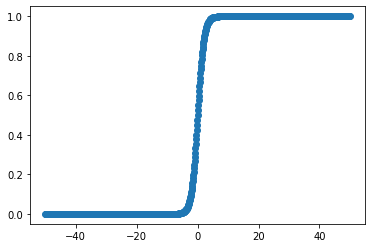

In [24]:
plt.scatter(z1,y1)
plt.plot()

[Question 2] Steepest descent method

In [27]:
# Pre-implementaition check for parameter update Predictive value label conversion

x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])

print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)



x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [28]:
# Parameters 0
theta = np.random.rand(x.shape[1])
print('theta:\n',theta)


theta:
 [0.21769681 0.38379799]


In [29]:
# Error of yhat, y
error = yhat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [30]:
# lamda 
lm = np.array([0,1])
theta*lm

array([0.        , 0.38379799])

In [33]:
# Update parameters 
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002    ,  0.0727596])

In [34]:
theta -= (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [0.21969681 0.31103839]


In [35]:
theta -= (0.01*np.mean(np.dot(error,x)) + theta*lm/len(x))
theta

array([0.23469681, 0.26383071])

[Question 3] Estimation

In [37]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])

print('x1:\n',x1)
print('x2:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x2:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [46]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43688797 0.46831728 0.34648986 0.43688797 0.37575547]
y_pred:
 [0 0 0 0 0]


[Question 4] Objective function


In [48]:
# check data creation
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

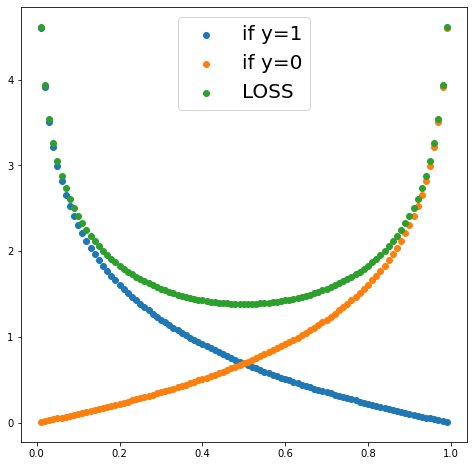

In [50]:
# Try to imagine the objectionve function J with check data 

J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# Plotting the learning Curve 

fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams['font.size'] = 20
plt.scatter(yh,J1,label='if y=1')
plt.scatter(yh,J2,label='if y=0')
plt.scatter(yh,J,label='LOSS')
plt.legend()

[Question 5] Learning and Estimation

In [51]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [52]:
import pandas as pd 

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

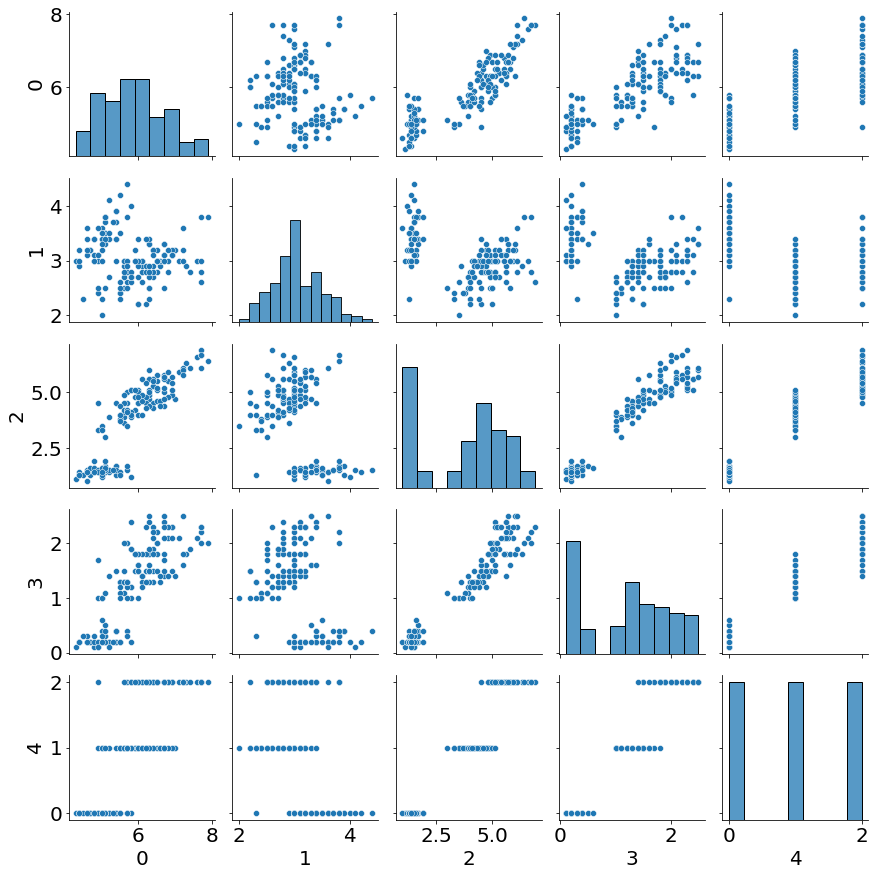

In [57]:
disp = False
if disp != True:
  sns.pairplot(iris,palette='tab10')

In [59]:
iris_X = iris.loc[iris[4]!=0,2:3].values
iris_y = iris.loc[iris[4]!=0,4].values

print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)


iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [60]:
# Train and estimate on Iris datase

from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape: (20, 2)
y_valid.shape: (20,)


In [61]:
np.unique(y)

array([1., 2.])

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [63]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01,C=0.01,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

In [66]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [67]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [68]:
y_prob

array([0.45721413, 0.65181817, 0.47849877, 0.67643387, 0.59778524,
       0.658008  , 0.45042541, 0.52143354, 0.63851501, 0.61227024,
       0.57036765, 0.54971404, 0.61187393, 0.45021883, 0.30490632,
       0.34849915, 0.47849877, 0.40855016, 0.50691721, 0.42915693])

In [69]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid,y_pred)
precision = precision_score(y_valid,y_pred)
recall = recall_score(y_valid,y_pred)
f1 = f1_score(y_valid,y_pred)

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.95
precision: 1.0
recall: 0.9
f1: 0.9473684210526316


[Question 6] Learning curve plot

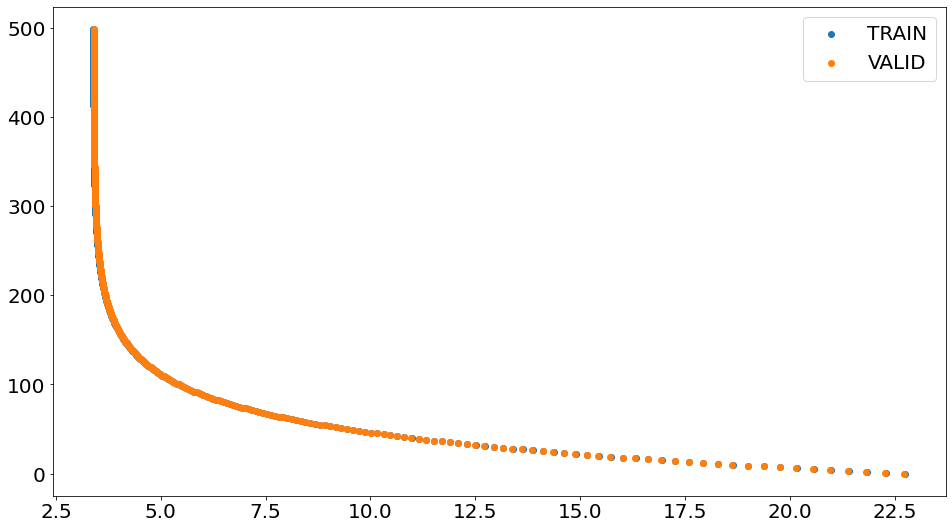

In [71]:
# plotting the learning curve

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.size'] = 20
plt.scatter(clf.loss,range(len(clf.loss)),label='TRAIN')
plt.scatter(clf.val_loss,range(len(clf.val_loss)),label='VALID')
plt.legend()

[Problem 7] Visualization of the decision region

In [74]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

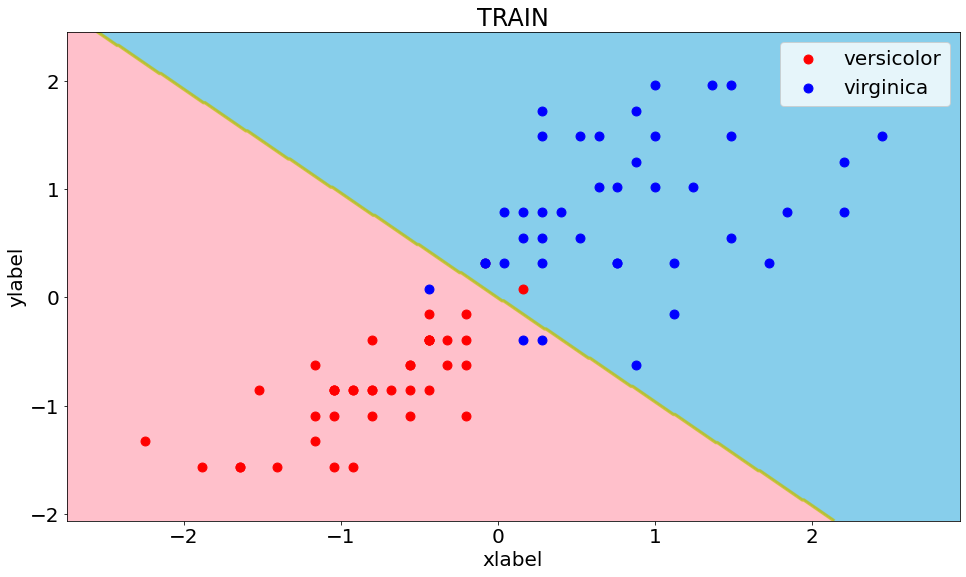

In [75]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN')

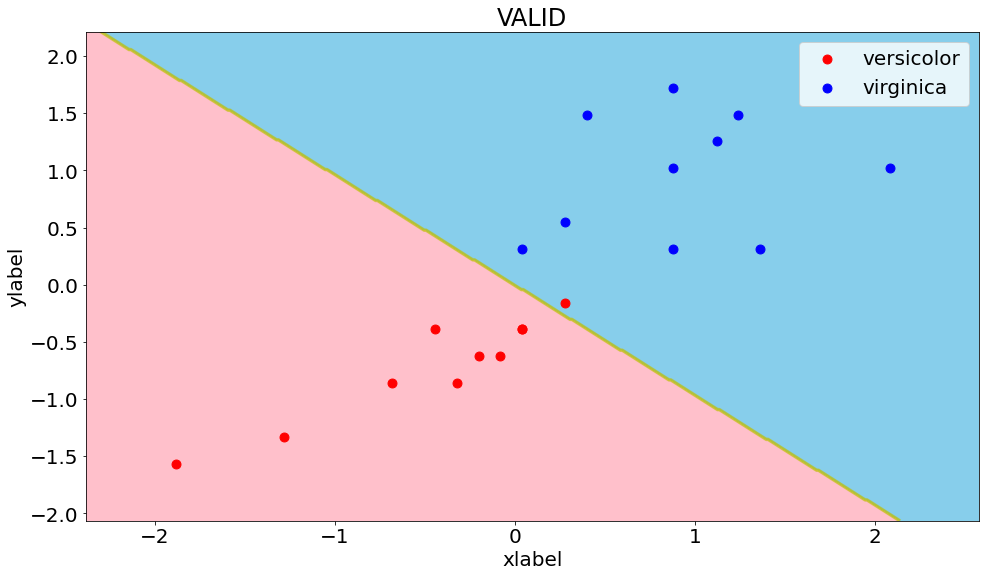

In [76]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')